#Projeto de Ciência de Dados utilizando o DataSet "Mobile Price Classification"

## Importação das Bibliotecas

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importando os Dados

In [104]:
dadosBrutos = pd.read_csv ('/content/train.csv', sep= ',')
dadosBrutos.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Analisando o DataSet

In [105]:
dadosBrutos.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [106]:
dadosBrutos.shape

(2000, 21)

In [107]:
dadosBrutos.sample(10, random_state=11)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
41,1646,1,2.3,0,8,1,41,0.2,185,2,...,1725,1932,3339,18,10,19,1,1,0,3
1457,840,0,0.9,1,6,0,33,0.7,150,6,...,1482,1591,2072,10,8,19,0,1,0,2
1373,1616,1,2.3,1,3,0,52,0.1,100,5,...,151,1133,657,7,3,2,1,1,0,0
771,550,1,0.5,0,16,1,23,0.1,145,2,...,486,1930,302,18,5,8,1,0,0,0
782,1592,0,2.1,0,6,1,50,0.1,181,2,...,510,522,2103,19,8,7,1,0,0,1
74,797,1,2.9,1,4,0,38,0.5,90,4,...,763,1413,590,9,2,6,0,1,0,0
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
566,1170,1,1.2,0,4,0,30,0.4,83,8,...,27,1722,1073,6,4,8,1,1,0,0
1701,1306,1,2.1,1,2,1,33,0.4,174,3,...,867,1258,2521,6,5,16,1,0,0,2
1862,1043,0,2.7,0,3,0,29,0.2,83,8,...,887,893,1183,5,3,8,1,0,0,0


In [108]:
dadosBrutos.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [109]:
dadosBrutos.duplicated().sum()

0

In [110]:
dadosBrutos.price_range.value_counts()


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Criando Mapa de Calor

Text(0.5, 1.0, 'Correlação')

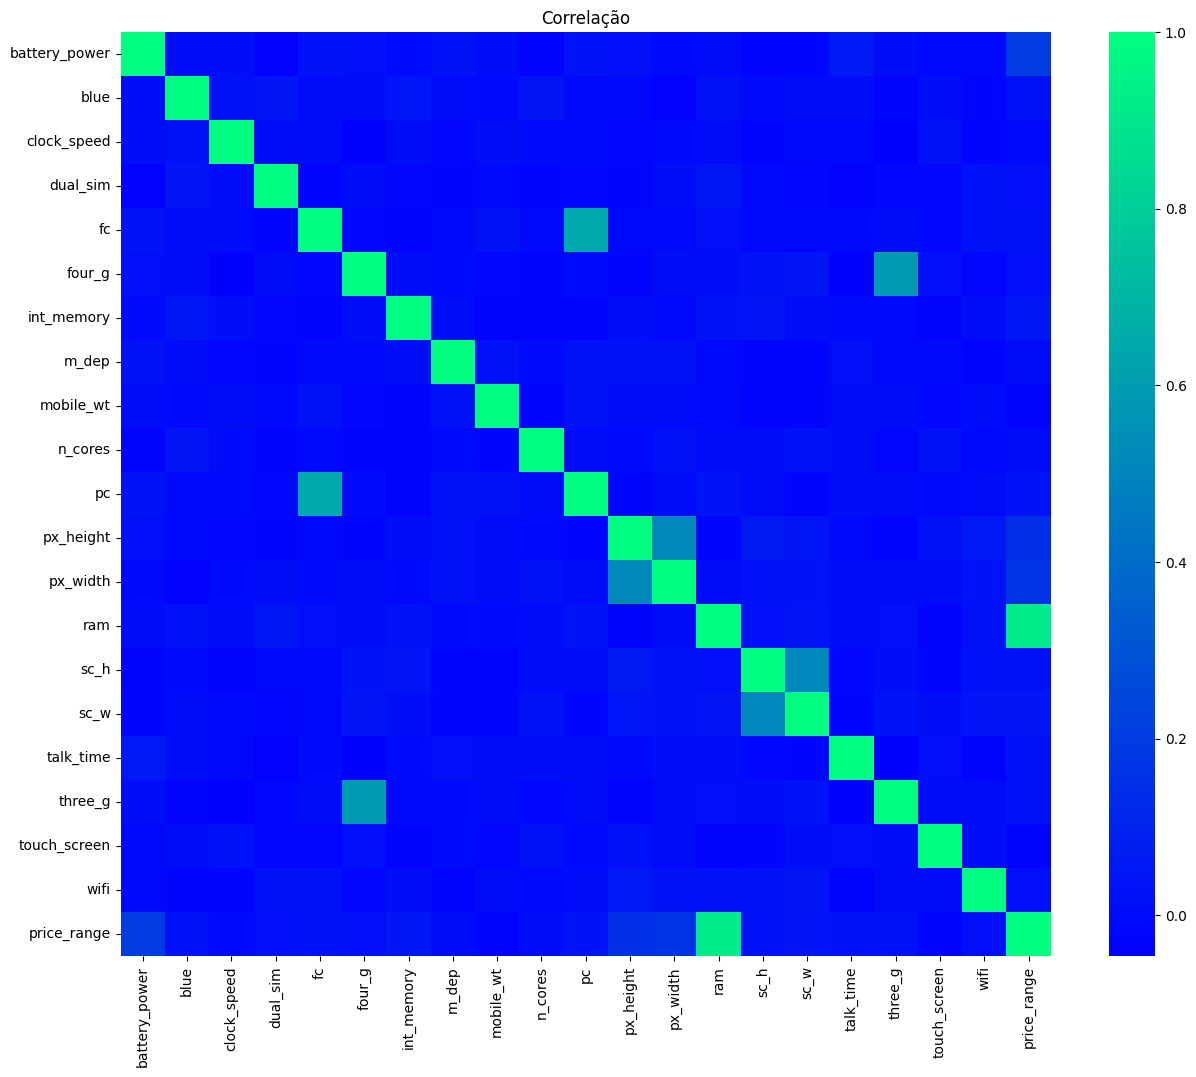

In [111]:
corr=dadosBrutos.corr()
fig = plt.figure(figsize=(15,12))
r = sb.heatmap(corr, cmap='winter')
r.set_title("Correlação")

## Criando countplot

<Axes: ylabel='count'>

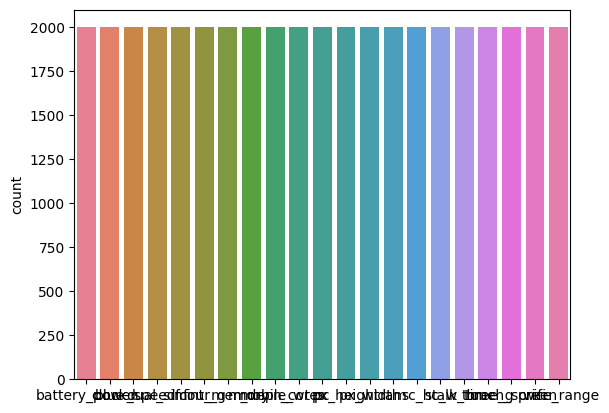

In [112]:
sb.countplot(data=dadosBrutos)

## Criando boxplot

<Axes: >

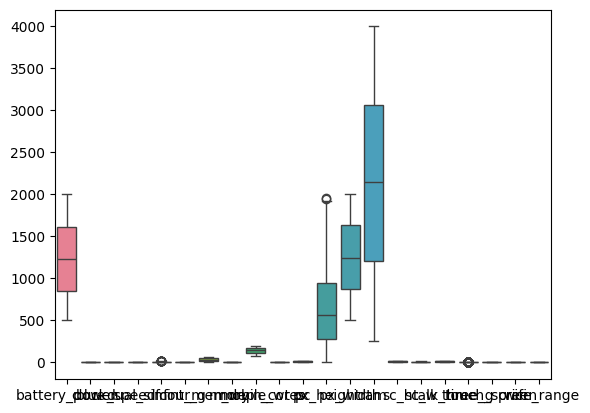

In [113]:
sb.boxplot(data=dadosBrutos)

## Indicando x, y

In [114]:
x=dadosBrutos.drop(["price_range"],axis=1)
y=dadosBrutos.price_range.values.reshape(-1,1)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.24, random_state=0)

# Criando a regressão Linear

In [123]:
model = LinearRegression()
model.fit(x_train,y_train.ravel())

LinearRegression()

In [124]:
previsao = model.predict(x_test)

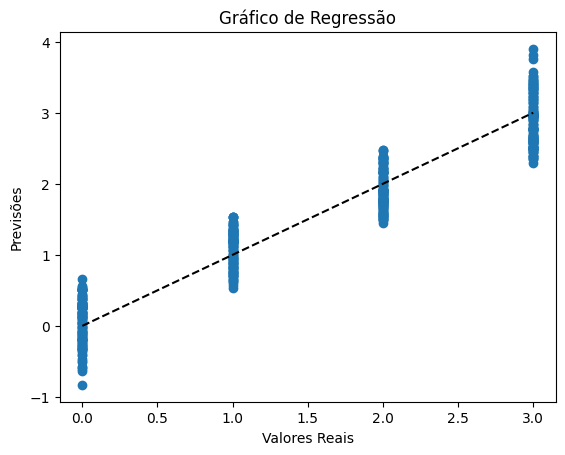

In [129]:
# Criar o gráfico de dispersão com os dados de teste
plt.scatter(y_test, previsao)

# Adicionar linha de regressão
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Regressão')

plt.show()